<a href="https://colab.research.google.com/github/yanpaing-DL/TensorFlow-Beginner/blob/main/coding-exercise/week4/part2/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset and make a directory

In [ ]:
# Downloading dataset

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [ ]:
# Unzipping zip file and extract

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'  #  create a directory
zip_ref = zipfile.ZipFile(local_zip, 'r')    #  read zipfile
zip_ref.extractall('/tmp/horse-or-human')  # extract all data from zipfile

local_zip = '/tmp/validation-horse-or-human.zip'   #  create a directory
zip_ref = zipfile.ZipFile(local_zip, 'r')   #  read zipfile
zip_ref.extractall('/tmp/validation-horse-or-human')    # extract all data from zipfile
zip_ref.close()


In [ ]:
# join path with os module

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')  

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')  

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2020-10-25 00:49:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   126MB/s    in 1.1s    

2020-10-25 00:49:02 (126 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-10-25 00:49:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

# Build Model

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Optimization

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# Data preprocessing with ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Model training

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.6860 - accuracy: 0.5662 - val_loss: 0.6534 - val_accuracy: 0.8906
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6664 - accuracy: 0.6285 - val_loss: 0.6276 - val_accuracy: 0.5508
Epoch 3/100
8/8 [==============================] - 18s 2s/step - loss: 0.6471 - accuracy: 0.6618 - val_loss: 0.5899 - val_accuracy: 0.6602
Epoch 4/100
8/8 [==============================] - 18s 2s/step - loss: 0.6222 - accuracy: 0.7164 - val_loss: 0.5496 - val_accuracy: 0.7148
Epoch 5/100
8/8 [==============================] - 21s 3s/step - loss: 0.5933 - accuracy: 0.6992 - val_loss: 0.5644 - val_accuracy: 0.6367
Epoch 6/100
8/8 [==============================] - 18s 2s/step - loss: 0.5787 - accuracy: 0.7086 - val_loss: 0.4610 - val_accuracy: 0.7969
Epoch 7/100
8/8 [==============================] - 18s 2s/step - loss: 0.5565 - accuracy: 0.7241 - val_loss: 0.5647 - val_accuracy: 0.6719
Epoch 8/100
8/8 [==========

 # Check in Model Accuracy

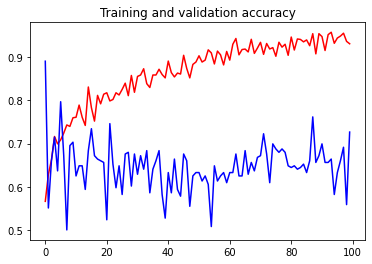

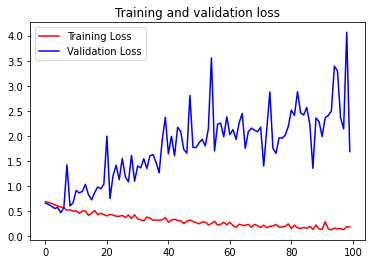

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()